In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae')
df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779.0,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [121]:
df['QScore'].value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

In [122]:
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

In [123]:
df = df.dropna()

In [124]:
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

In [125]:
df['QScore'] = df['QScore'].replace(['1A'],'2A') 

In [126]:
df.QScore.value_counts() 

3A    51473
2A      240
Name: QScore, dtype: int64

In [127]:
df_2A = df[df.QScore=='2A'] 

In [128]:
df_3A = df[df.QScore== '3A'].sample(350) 

In [129]:
data_df = df_2A.append(df_3A) 

In [130]:
import sklearn.utils 
data_df = sklearn.utils.shuffle(data_df) 

In [131]:
data_df = data_df.reset_index(drop= True)

In [132]:
data_df.shape 
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

In [133]:
#more preprocessing 
data_df = data_df.drop(columns=['country_code','country','year'])

In [134]:
X = data_df.drop(columns='QScore') 
y = data_df['QScore'] 

In [135]:
#split the data into training and testing sets 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 , random_state= 0 ) 
y_train.value_counts() 

3A    247
2A    166
Name: QScore, dtype: int64

In [136]:
#encode categorical variable 
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [137]:
x_train.record = encoder.fit_transform(x_train.record) 
x_test.record = encoder.transform(x_test.record) 

In [138]:
import imblearn 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state= 1) 
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train) 

In [139]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=[ 'record' ])) 
normalised_train_df = pd.DataFrame(normalised_train_df, 
columns=x_train_balanced.drop(columns=[ 'record' ]).columns) 
normalised_train_df[ 'record' ] = x_train_balanced[ 'record' ] 

In [140]:
x_test = x_test.reset_index(drop= True ) 
normalised_test_df = scaler.transform(x_test.drop(columns=[ 'record' ])) 
normalised_test_df = pd.DataFrame(normalised_test_df, 
columns=x_test.drop(columns=[ 'record' ]).columns) 
normalised_test_df[ 'record' ] = x_test ['record'] 

In [141]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression() 
log_reg.fit(normalised_train_df, y_balanced) 
#returns 
LogisticRegression(C= 1.0 , class_weight= None , dual= False , fit_intercept= True , 
 intercept_scaling= 1 , l1_ratio= None , max_iter= 100 , 
 multi_class= 'auto' , n_jobs= None , penalty= 'l2' , 
 random_state= None , solver= 'lbfgs' , tol= 0.0001 , verbose= 0 , 
 warm_start= False )

LogisticRegression()

## Cross-validation and accuracy

In [142]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv= 5 , scoring= 'f1_macro' ) 
scores 

array([0.55576923, 0.54526896, 0.40306592, 0.51391162, 0.55969191])

## K-Fold Cross Validation 


In [143]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits= 5) 
kf.split(normalised_train_df) 
f1_scores = [] 

In [25]:
#run for every split 
for train_index, test_index in kf.split(normalised_train_df):
    x_train, x_test = normalised_train_df.iloc[train_index], 
    normalised_train_df.iloc[test_index] 
    #y_train, y_test = y_balanced[train_index], 
    #y_balanced[test_index] 
    #model = LogisticRegression().fit(x_train, y_train)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
#save result to list 
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test),pos_label= '2A' )* 100 ) 

NameError: name 'f1_score' is not defined

## Stratified K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= 1 ) 
f1_scores = [] 

In [ ]:
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    x_train, x_test = np.array(normalised_train_df)[train_index], 
    np.array(normalised_train_df)[test_index] 
    y_train, y_test = y_balanced[train_index], y_balanced[test_index] 
    model = LogisticRegression().fit(x_train, y_train) 

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
#save result to list 
f1_scores.append(f1_score(y_true=y_test, y_pred=model.predict(x_test), pos_label= '2A' ))

NameError: name 'f1_score' is not defined

## Leave One Out Cross Validation (LOOCV) 

In [144]:
from sklearn.model_selection import LeaveOneOut 
loo = LeaveOneOut() 
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, cv=loo,scoring= 'f1_macro' ) 
average_score = scores.mean() * 100 

## Confusion Matrix 


In [145]:
model = LogisticRegression().fit(x_train, y_train) 
y_pred = model.predict(x_test)
y_pred

array(['2A', '2A', '3A', '2A', '2A', '3A', '3A', '3A', '3A', '3A', '3A',
       '2A', '3A', '3A', '3A', '2A', '3A', '2A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '2A', '3A', '2A', '2A', '3A',
       '2A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '2A', '3A', '2A',
       '3A', '3A', '2A', '3A', '3A', '2A', '2A', '3A', '3A', '2A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '2A', '3A', '3A', '3A', '3A',
       '3A', '3A', '2A', '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '2A', '3A', '2A', '3A', '2A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '2A', '3A', '3A', '3A', '3A',
       '2A', '3A', '3A', '3A', '3A', '3A', '2A', '2A', '3A', '2A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '2A', '2A', '3A', '3A', '3A',
       '3A', '2A', '3A', '3A', '3A', '3A', '2A', '2A', '3A', '3A', '2A',
       '3A', '3A', '3A', '3A', '3A', '2A', '2A', '3

In [146]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score,confusion_matrix,roc_curve, roc_auc_score
new_predictions = log_reg.predict(normalised_test_df) 
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions, labels=[ '2A' , '3A' ])
cnf_mat

array([[36, 38],
       [52, 51]], dtype=int64)

## Accuracy

In [147]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions) 
print( 'Accuracy: {}' .format(round(accuracy* 100 ), 2 ))

Accuracy: 49


## Precision 


In [148]:
precision = precision_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' ) 
print( 'Precision: {}' .format(round(precision* 100 ), 2 ))

Precision: 41


## Recall 


In [149]:
recall = recall_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' ) 
print( 'Recall: {}' .format(round(recall* 100 ), 2 ))

Recall: 49


## F1-Score 


In [150]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions, pos_label= '2A' ) 
print( 'F1: {}' .format(round(f1* 100 ), 2 ))

F1: 44


In [151]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_df,y_balanced)

DecisionTreeClassifier()

In [152]:
import sklearn
import matplotlib.pyplot as plt 
from sklearn import tree 
%matplotlib inline

[Text(0.7205317982456141, 0.96875, 'X[2] <= 0.003\ngini = 0.5\nsamples = 494\nvalue = [247, 247]'),
 Text(0.5726425438596491, 0.90625, 'X[4] <= 0.004\ngini = 0.498\nsamples = 452\nvalue = [241, 211]'),
 Text(0.43914473684210525, 0.84375, 'X[1] <= 0.003\ngini = 0.5\nsamples = 387\nvalue = [193, 194]'),
 Text(0.3519736842105263, 0.78125, 'X[0] <= 0.001\ngini = 0.5\nsamples = 376\nvalue = [183, 193]'),
 Text(0.23026315789473684, 0.71875, 'X[6] <= 0.0\ngini = 0.499\nsamples = 317\nvalue = [164, 153]'),
 Text(0.15789473684210525, 0.65625, 'X[2] <= 0.0\ngini = 0.499\nsamples = 269\nvalue = [128, 141]'),
 Text(0.14035087719298245, 0.59375, 'X[1] <= 0.0\ngini = 0.5\nsamples = 261\nvalue = [128, 133]'),
 Text(0.12280701754385964, 0.53125, 'X[3] <= 0.0\ngini = 0.499\nsamples = 257\nvalue = [124, 133]'),
 Text(0.08771929824561403, 0.46875, 'X[6] <= 0.0\ngini = 0.5\nsamples = 248\nvalue = [123, 125]'),
 Text(0.07017543859649122, 0.40625, 'X[7] <= 1.5\ngini = 0.5\nsamples = 244\nvalue = [119, 125]'

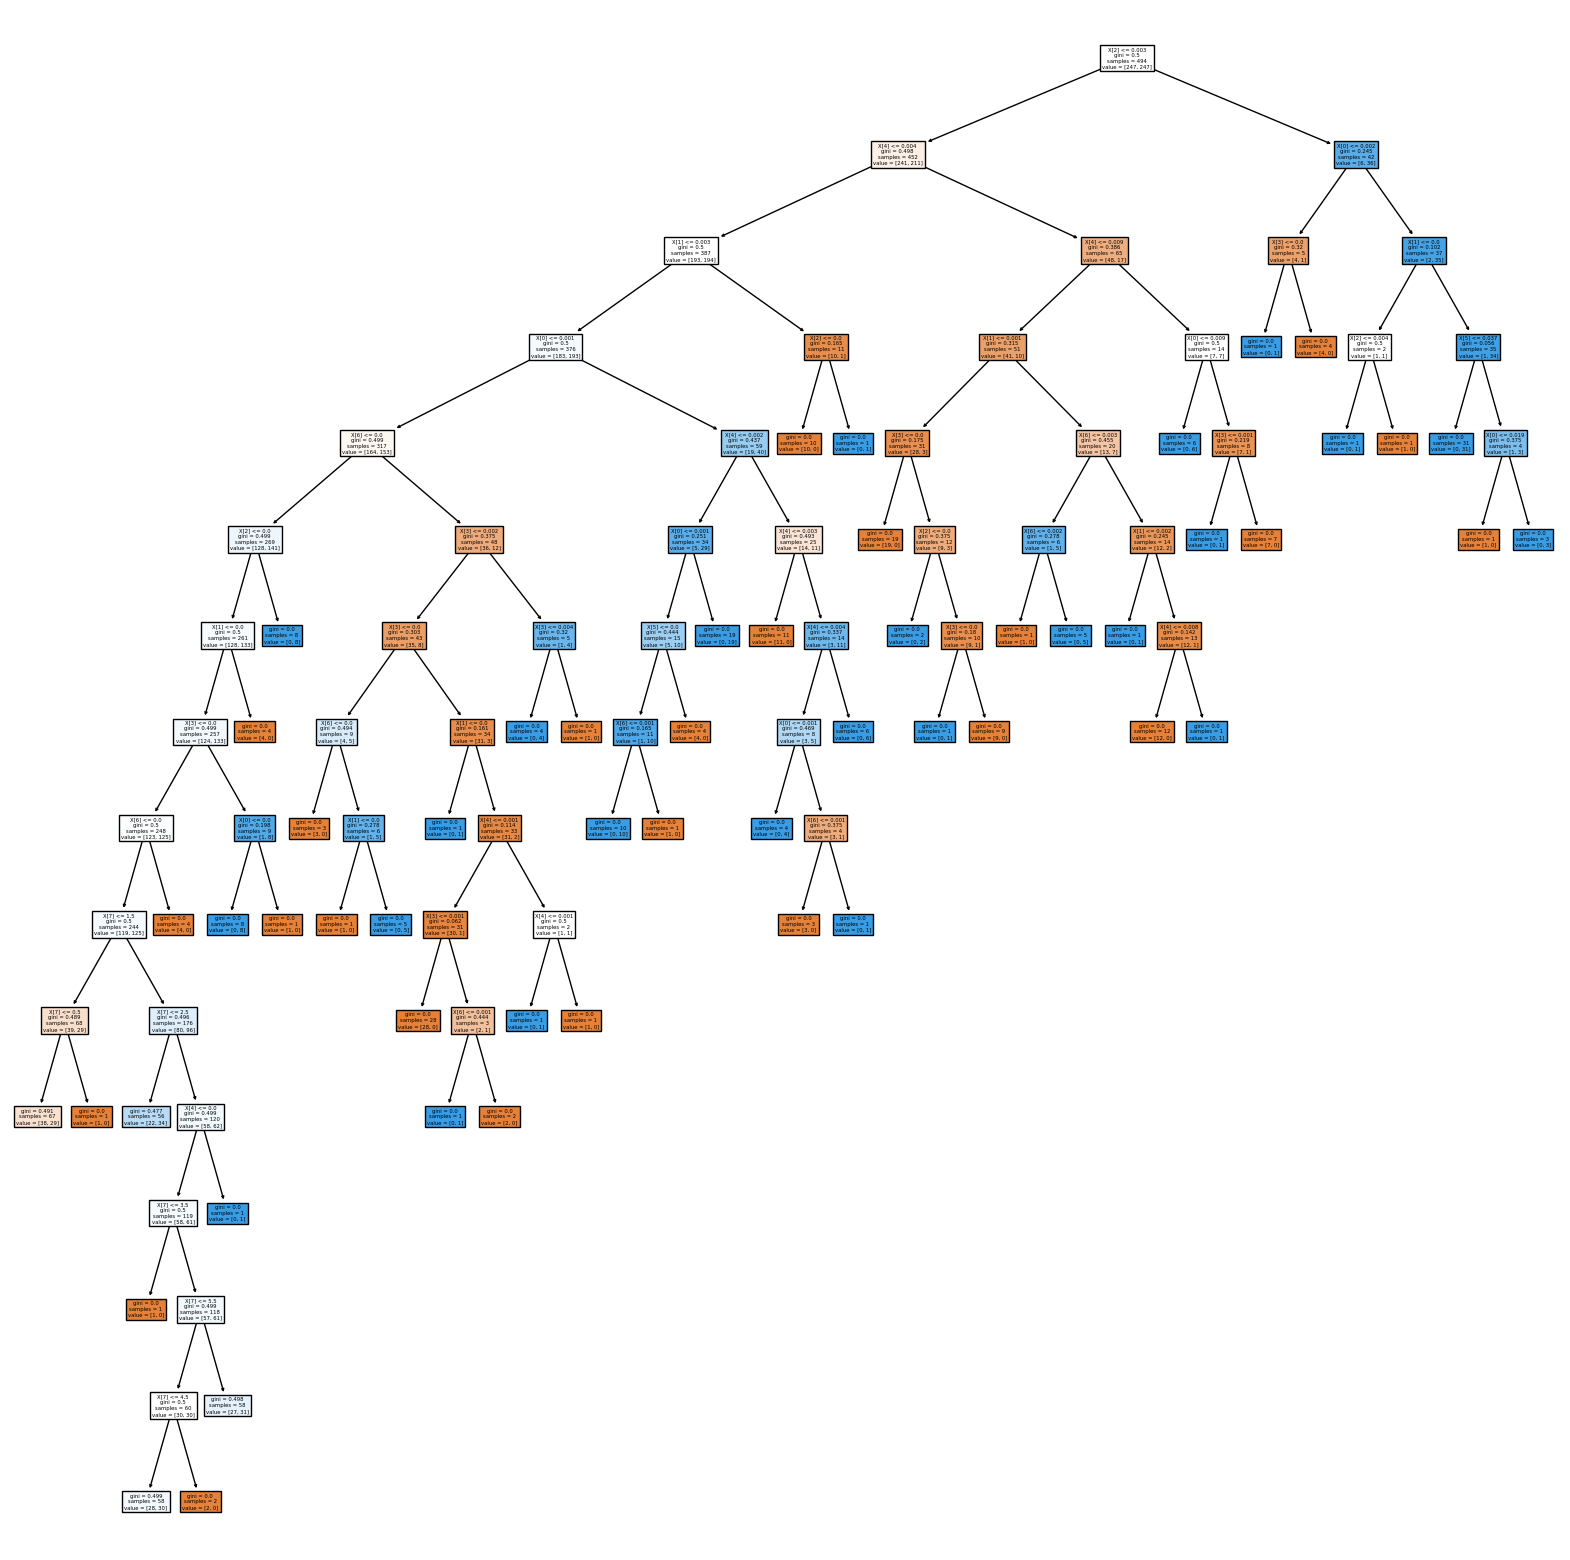

In [153]:
plt.figure(figsize=(20,20))
tree.plot_tree(dec_tree,filled=True)

In [154]:
df.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land        object
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
QScore             object
dtype: object

In [155]:
x1 = df.drop(columns=['QScore','country','record','forest_land'])
x1

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
0,1992,1,1.402924e-01,1.995463e-01,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01
1,1992,1,4.830000e+05,6.870000e+05,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06
2,1992,1,1.598044e-01,1.352610e-01,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01
3,1992,1,5.501762e+05,4.656780e+05,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06
4,1992,1,3.875102e-01,1.894622e-01,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00
...,...,...,...,...,...,...,...,...
72181,2016,5001,3.984702e+09,1.504757e+09,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10
72182,2016,5001,5.336445e-01,1.402092e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00
72183,2016,5001,3.984702e+09,1.046937e+09,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10
72184,2016,5001,5.336445e-01,1.402092e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00


In [156]:
y1 = df.QScore
y1

0        3A
1        3A
2        3A
3        3A
4        3A
         ..
72181    3A
72182    3A
72183    3A
72184    3A
72185    3A
Name: QScore, Length: 51713, dtype: object

In [157]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

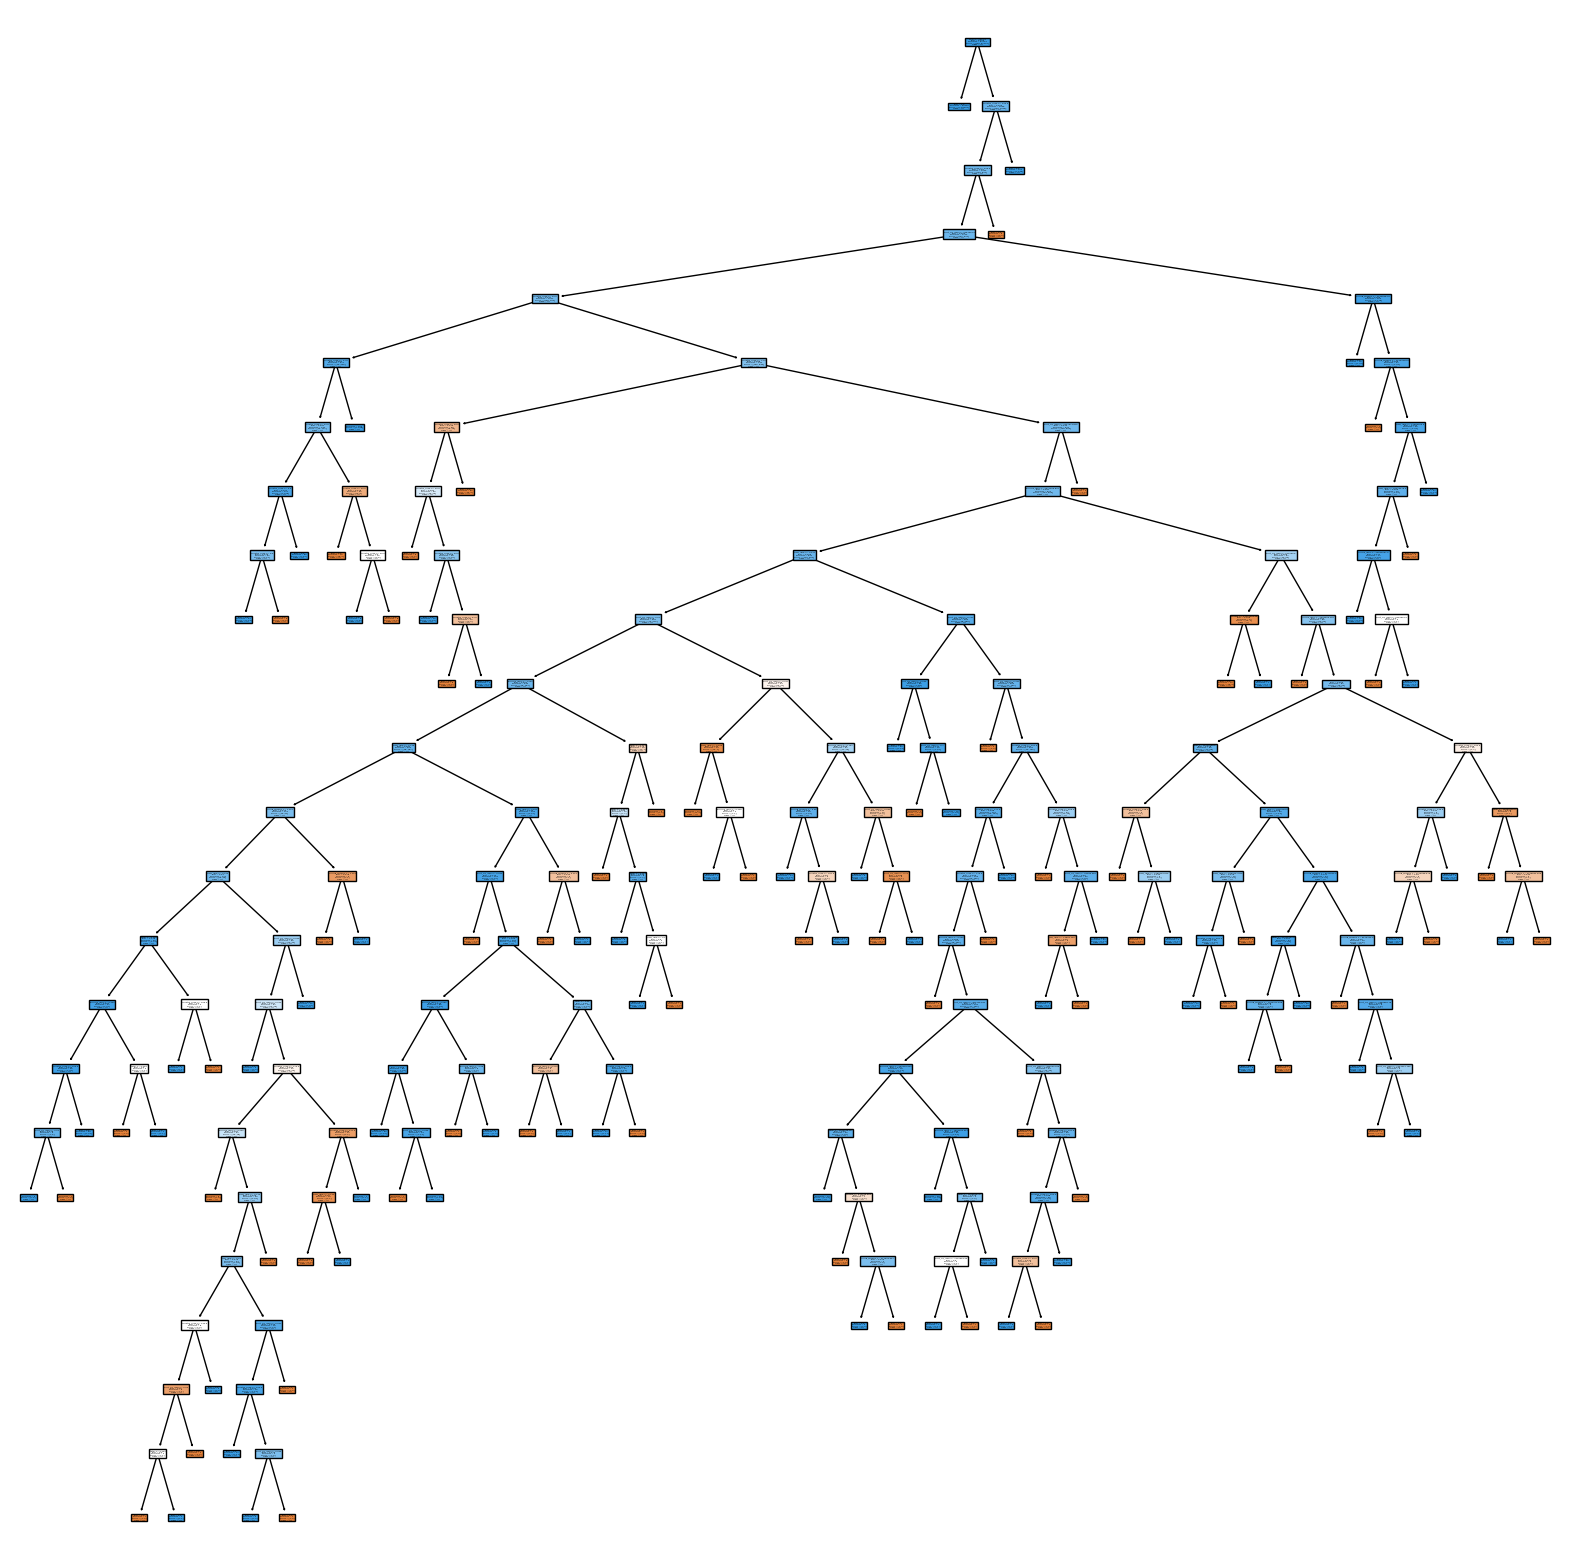

In [158]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True,class_names=[str(i) for i in set(y1)] ,feature_names=x1.columns)
plt.savefig('dt_model_footprint')

In [159]:
dt_model1.predict(x1)

array(['3A', '3A', '3A', ..., '3A', '3A', '3A'], dtype=object)

In [160]:
dt_model1.score(x1,y1)

1.0

In [161]:
dt_model1.score(x_test,y_test)

0.5819209039548022

In [162]:
dt_model1.cost_complexity_pruning_path(x1,y1)

{'ccp_alphas': array([0.00000000e+00, 1.26437483e-05, 1.54699979e-05, 1.61145811e-05,
        1.69203102e-05, 1.71888865e-05, 1.78499975e-05, 1.80483309e-05,
        1.81535689e-05, 1.84341042e-05, 1.88824974e-05, 1.91099974e-05,
        2.57833298e-05, 2.57833298e-05, 2.57833298e-05, 2.74643018e-05,
        2.90062460e-05, 3.09399957e-05, 3.15845790e-05, 3.16431775e-05,
        3.22291622e-05, 3.43777731e-05, 3.45585967e-05, 3.51590861e-05,
        3.56999951e-05, 3.72937449e-05, 3.73858282e-05, 3.74172713e-05,
        3.77081198e-05, 3.83739531e-05, 4.01624945e-05, 4.15518095e-05,
        4.64099936e-05, 4.76630995e-05, 5.12952561e-05, 5.15666596e-05,
        6.36824372e-05, 6.38401427e-05, 6.58012062e-05, 6.87555461e-05,
        7.36291353e-05, 7.63528089e-05, 7.79050258e-05, 8.79124436e-05,
        1.03133319e-04, 1.06708785e-04, 1.13374390e-04, 1.16024984e-04,
        1.17866650e-04, 1.22777761e-04, 1.44122202e-04, 2.02222194e-04,
        2.66533216e-04, 1.68648723e-03]),
 'impuri

In [163]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.00000000e+00, 1.26437483e-05, 1.54699979e-05, 1.61145811e-05,
       1.69203102e-05, 1.71888865e-05, 1.78499975e-05, 1.80483309e-05,
       1.81535689e-05, 1.84341042e-05, 1.88824974e-05, 1.91099974e-05,
       2.57833298e-05, 2.57833298e-05, 2.57833298e-05, 2.74643018e-05,
       2.90062460e-05, 3.09399957e-05, 3.15845790e-05, 3.16431775e-05,
       3.22291622e-05, 3.43777731e-05, 3.45585967e-05, 3.51590861e-05,
       3.56999951e-05, 3.72937449e-05, 3.73858282e-05, 3.74172713e-05,
       3.77081198e-05, 3.83739531e-05, 4.01624945e-05, 4.15518095e-05,
       4.64099936e-05, 4.76630995e-05, 5.12952561e-05, 5.15666596e-05,
       6.36824372e-05, 6.38401427e-05, 6.58012062e-05, 6.87555461e-05,
       7.36291353e-05, 7.63528089e-05, 7.79050258e-05, 8.79124436e-05,
       1.03133319e-04, 1.06708785e-04, 1.13374390e-04, 1.16024984e-04,
       1.17866650e-04, 1.22777761e-04, 1.44122202e-04, 2.02222194e-04,
       2.66533216e-04, 1.68648723e-03])

Text(0, 0.5, 'score')

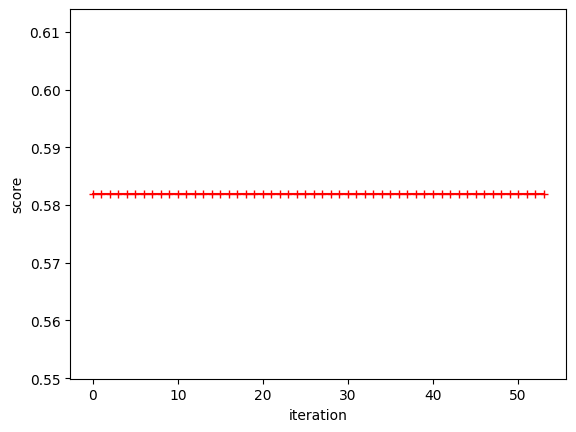

In [164]:
dt_model2 = []
score = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test, y_test))

plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [165]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=1.2643748261484633e-05),
 DecisionTreeClassifier(ccp_alpha=1.546999787287529e-05),
 DecisionTreeClassifier(ccp_alpha=1.611458111757843e-05),
 DecisionTreeClassifier(ccp_alpha=1.692031017345735e-05),
 DecisionTreeClassifier(ccp_alpha=1.718888652541699e-05),
 DecisionTreeClassifier(ccp_alpha=1.784999754562533e-05),
 DecisionTreeClassifier(ccp_alpha=1.8048330851687847e-05),
 DecisionTreeClassifier(ccp_alpha=1.8153568932455703e-05),
 DecisionTreeClassifier(ccp_alpha=1.8434104157229886e-05),
 DecisionTreeClassifier(ccp_alpha=1.8882497403656596e-05),
 DecisionTreeClassifier(ccp_alpha=1.9109997372375345e-05),
 DecisionTreeClassifier(ccp_alpha=2.5783329788125486e-05),
 DecisionTreeClassifier(ccp_alpha=2.5783329788125486e-05),
 DecisionTreeClassifier(ccp_alpha=2.5783329788125486e-05),
 DecisionTreeClassifier(ccp_alpha=2.746430177921405e-05),
 DecisionTreeClassifier(ccp_alpha=2.9006246011641173e-05),
 DecisionTreeClassifier(ccp_alpha=3

In [166]:
train_score = [i.score(x1,y1) for i in dt_model2]
test_score = [i.score(x_test,y_test) for i in dt_model2]

In [167]:
train_score

[1.0,
 0.9999806625026589,
 0.9999613250053178,
 0.9999419875079767,
 0.9999226500106356,
 0.9999033125132946,
 0.9998839750159534,
 0.9998646375186123,
 0.999806625026589,
 0.9997486125345658,
 0.9997292750372246,
 0.9997099375398836,
 0.9996325875505192,
 0.9996325875505192,
 0.9996132500531781,
 0.9995939125558371,
 0.9994972250691315,
 0.9995552375611548,
 0.9994585500744494,
 0.9994198750797672,
 0.9994005375824261,
 0.999381200085085,
 0.9993618625877438,
 0.9993425250904028,
 0.9994005375824261,
 0.9992845125983795,
 0.9992458376036973,
 0.999168487614333,
 0.9991104751223097,
 0.9990911376249686,
 0.9990524626302864,
 0.9990331251329453,
 0.9989944501382632,
 0.9989364376462398,
 0.9989171001488988,
 0.9988784251542165,
 0.9988204126621932,
 0.9986270376887824,
 0.9985110127047357,
 0.9984530002127124,
 0.9983756502233481,
 0.9980662502658906,
 0.9979502252818441,
 0.9976988378164098,
 0.9976214878270454,
 0.99752480034034,
 0.9969833504147894,
 0.9968286504360606,
 0.996751300

In [168]:
test_score

[0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039548022,
 0.5819209039

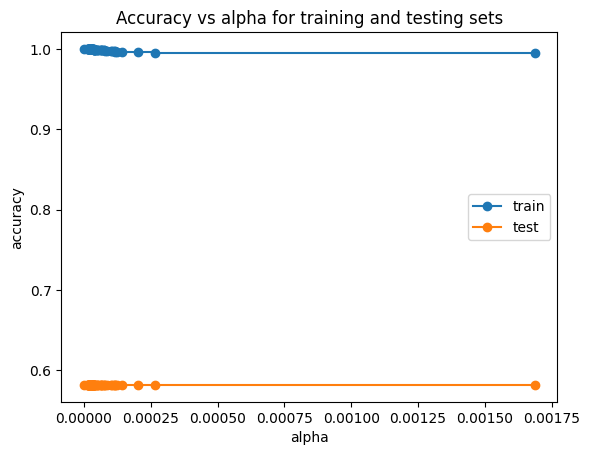

In [169]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha, train_score, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alpha, test_score, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [170]:
dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha=0.14)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.14, random_state=0)

[Text(0.5, 0.5, 'gini = 0.009\nsamples = 51713\nvalue = [240, 51473]')]

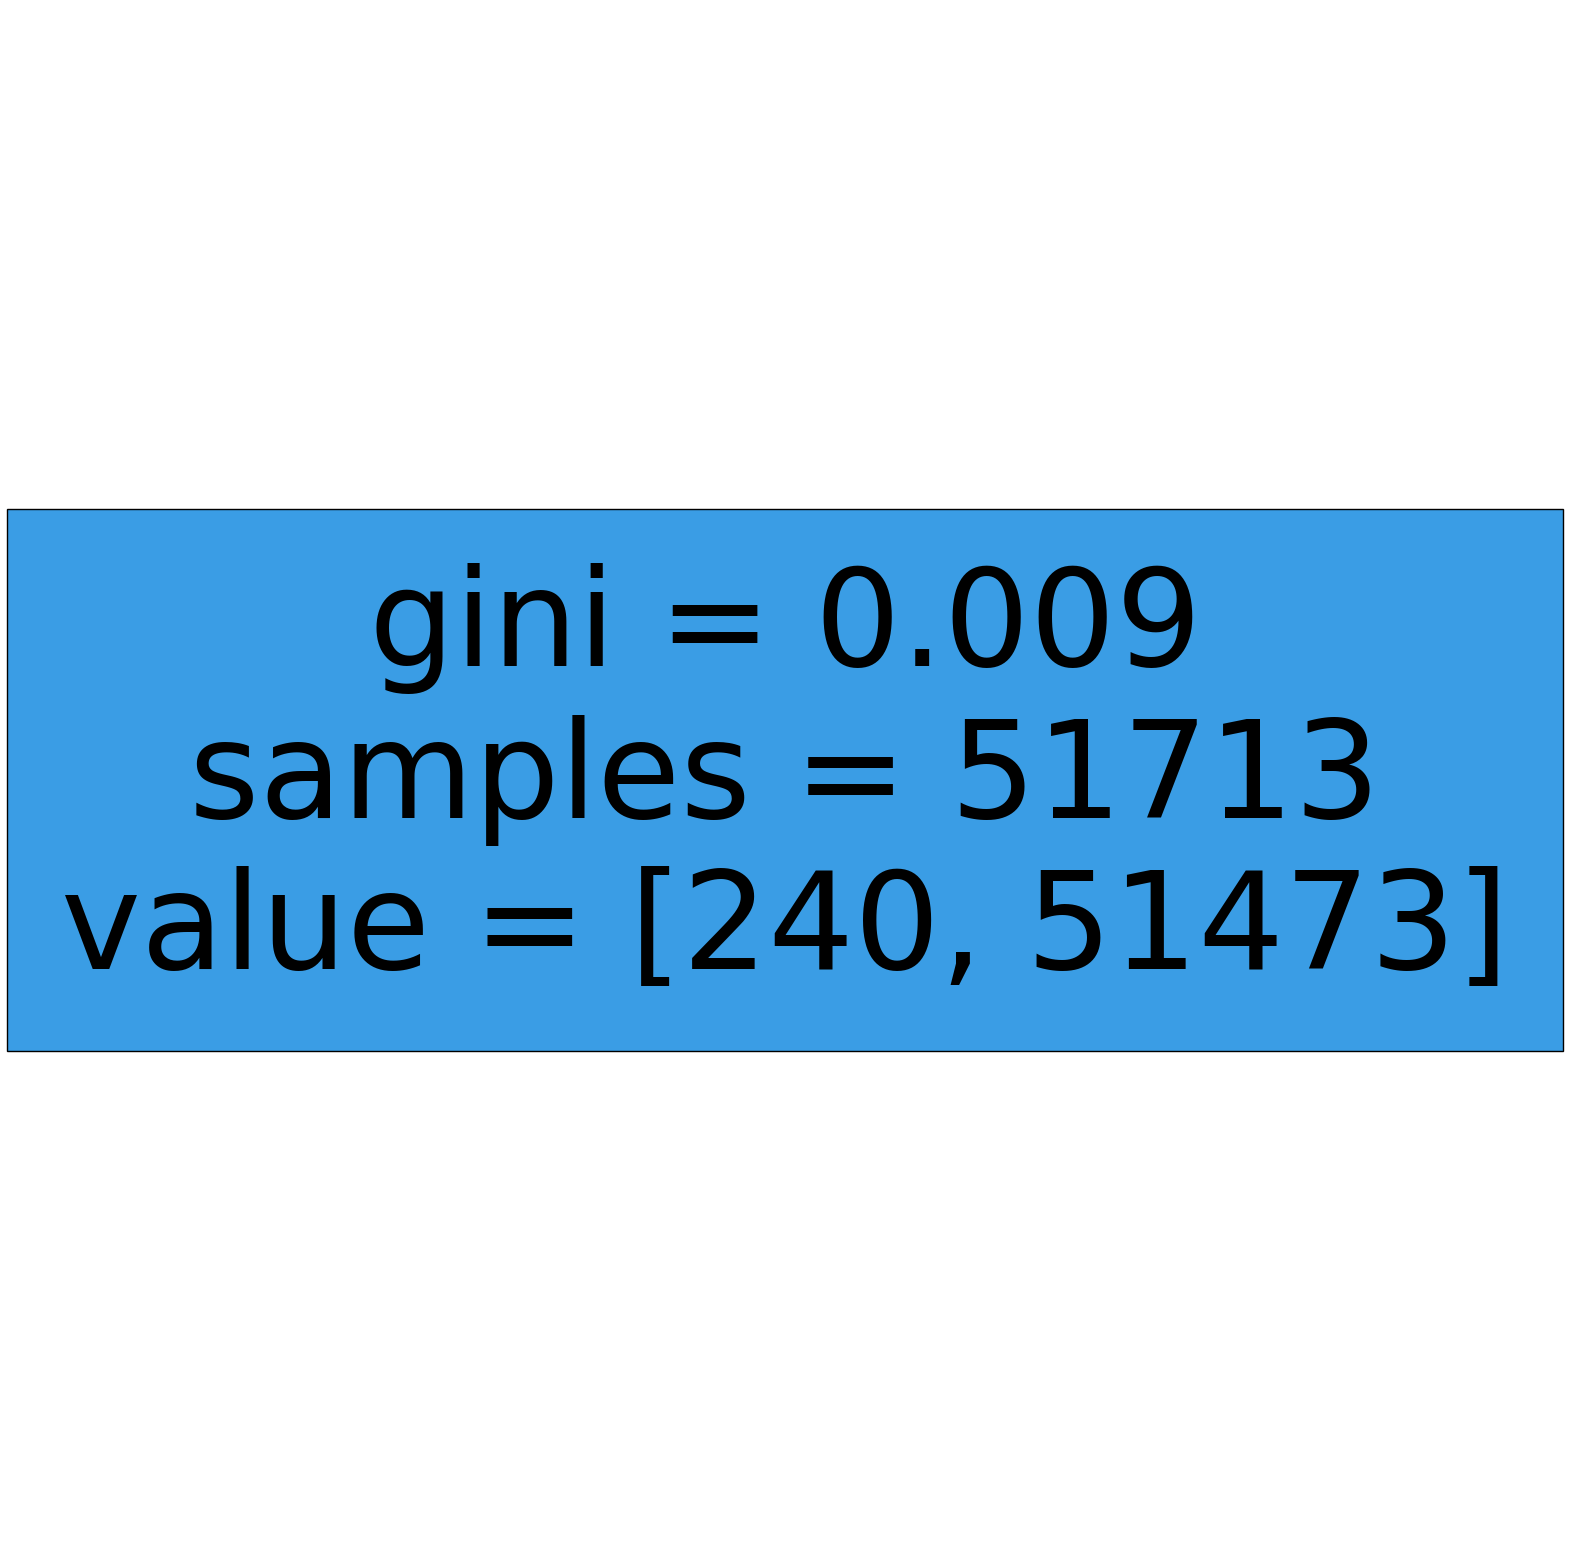

In [171]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [172]:
dt_model_ccp.score(x1,y1)

0.9953590006381374

In [173]:
dt_model_ccp.score(x_test,y_test)

0.5819209039548022

In [174]:
rand_pram = {"criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : range(2,40,1),
             "min_samples_split":range(2,10 ,1),
             "min_samples_leaf":range(1,10,1),
             'ccp_alpha':np.random.rand(20),
            }

In [85]:
from sklearn.model_selection import RandomizedSearchCV
rand_ccp = RandomizedSearchCV(estimator=dt_model_ccp,param_distributions=rand_pram , cv = 10 , n_jobs=-1)

In [176]:
rand_ccp.fit(x1,y1)

In [177]:
rand_ccp.best_params_

{'n_estimators': 5,
 'min_samples_split': 9,
 'min_samples_leaf': 9,
 'max_depth': 2,
 'criterion': 'entropy'}

In [178]:
dt_cpp_new = DecisionTreeClassifier(criterion='gini' , max_depth=22 ,min_samples_leaf= 7, min_samples_split=9 , splitter='random',ccp_alpha=0.082)

In [179]:
dt_cpp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.082, max_depth=22, min_samples_leaf=7,
                       min_samples_split=9, splitter='random')

In [180]:
dt_cpp_new.score(x1,y1)

0.9953590006381374

In [181]:
dt_cpp_new.score(x_test,y_test)

0.5819209039548022

In [182]:
pred = dt_cpp_new.predict(x_train)

In [183]:
confusion_matrix(y_train,pred)

array([[  0, 166],
       [  0, 247]], dtype=int64)

## Bagging

In [184]:
from sklearn.ensemble import BaggingClassifier

In [185]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)

In [186]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [187]:
bag_dt.predict(x_test)

array(['2A', '3A', '3A', '2A', '2A', '2A', '3A', '2A', '2A', '2A', '2A',
       '3A', '3A', '2A', '3A', '2A', '2A', '3A', '3A', '3A', '3A', '2A',
       '3A', '2A', '2A', '3A', '2A', '3A', '2A', '2A', '2A', '2A', '2A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '2A',
       '3A', '2A', '2A', '2A', '3A', '2A', '3A', '3A', '3A', '2A', '2A',
       '2A', '3A', '2A', '3A', '3A', '3A', '2A', '3A', '3A', '2A', '3A',
       '2A', '3A', '2A', '2A', '3A', '2A', '3A', '2A', '2A', '2A', '3A',
       '3A', '3A', '3A', '2A', '3A', '3A', '2A', '2A', '3A', '2A', '3A',
       '2A', '2A', '3A', '3A', '2A', '2A', '3A', '3A', '3A', '3A', '3A',
       '2A', '2A', '3A', '2A', '3A', '3A', '3A', '2A', '3A', '3A', '3A',
       '2A', '2A', '2A', '2A', '3A', '2A', '2A', '3A', '3A', '3A', '3A',
       '3A', '3A', '2A', '2A', '3A', '3A', '2A', '2A', '3A', '3A', '3A',
       '2A', '2A', '3A', '3A', '2A', '3A', '2A', '3A', '3A', '2A', '2A',
       '2A', '2A', '2A', '2A', '3A', '3A', '2A', '2

In [188]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [189]:
bag_dt.classes_

array(['2A', '3A'], dtype=object)

In [190]:
bag_dt.score(x_test,y_test)

0.7344632768361582

##  KNeighborsClassifie

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
bag_knc=BaggingClassifier(KNeighborsClassifier(6),n_estimators=100)

In [193]:
bag_knc.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6),
                  n_estimators=100)

In [194]:
bag_knc.predict(x_test)

array(['3A', '3A', '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '2A', '2A', '2A', '3A', '3A', '3A', '2A',
       '3A', '3A', '2A', '3A', '3A', '3A', '2A', '2A', '3A', '3A', '3A',
       '3A', '3A', '3A', '2A', '3A', '3A', '2A', '3A', '2A', '3A', '2A',
       '3A', '3A', '3A', '2A', '3A', '2A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '2A', '3A', '3A', '3A', '3A', '2A', '2A',
       '3A', '3A', '2A', '2A', '3A', '2A', '3A', '3A', '2A', '3A', '3A',
       '3A', '2A', '3A', '3A', '3A', '2A', '3A', '3A', '3A', '3A', '3A',
       '2A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '2A', '2A',
       '2A', '3A', '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '2A', '3A', '2A', '3A', '2A', '3A', '2A', '3A', '3A', '3A',
       '3A', '3A', '3A', '2A', '2A', '3A', '3A', '3A', '2A', '3A', '2A',
       '3A', '3A', '3A', '3A', '3A', '3A', '2A', '3

In [195]:
bag_knc.score(x_test,y_test)

0.5480225988700564

## RandomForest

In [196]:
rand_pram = {
            "n_estimators":[5,10,50,100,120,150],
            "criterion":['gini','entropy'],
            "max_depth" : range(2,40,1),
            "min_samples_split":range(2,10 ,1),
            "min_samples_leaf":range(1,10,1),
        }

In [197]:
rand_ccp = RandomizedSearchCV(estimator=rf,param_distributions=rand_pram , cv = 10 , n_jobs=-1)

In [ ]:
rand_ccp.fit(x1,y1)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 40),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [5, 10, 50, 100, 120,
                                                         150]})

In [ ]:
rand_ccp.best_params_

In [199]:
rf_ne=RandomForestClassifier(criterion='entropy',max_depth=2,min_samples_leaf=9,min_samples_split=9,n_estimators=5)

In [202]:
rf_ne.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=9,
                       min_samples_split=9, n_estimators=5)

In [203]:
rf_ne.predict(x_test)

array(['3A', '3A', '3A', '2A', '3A', '3A', '3A', '2A', '3A', '3A', '3A',
       '3A', '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '2A', '3A', '3A', '3A', '2A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A', '2A',
       '3A', '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A', '2A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '2A', '2A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '2A', '3A', '3A', '3A',
       '3A', '2A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3A',
       '3A', '3A', '3A', '3A', '3A', '3A', '3A', '3

In [204]:
rf_ne.score(x_test,y_test)

0.6214689265536724